<a href="https://colab.research.google.com/github/alvinsbkt/antioxidant-classification-SVM/blob/main/Antioxidant_Protein_Binary_Classification_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparation (Import, Download Data)

In [ ]:
#mounting google drive to google colaboratory
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#installing necessary packages in google colaboratory
!pip install biopython
!pip install discere

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import discere.discere as di
import itertools as it
import os,pickle
import shutil, pkg_resources
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.decomposition import PCA
from itertools import cycle
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, accuracy_score,confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/My Drive/PemodelanMatematika/train.csv',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,20,4,12,21,15,11,5,17,21,19,2,7,14,5,10,9,12,17,6,5,0.112,0.341,0.177,0.267,6.247,26469.27,40.58,1
1,12,2,10,4,5,29,9,9,4,10,2,9,7,2,4,9,14,11,0,0,0.033,0.230,0.355,0.184,5.750,15171.57,18.15,1
2,9,3,10,9,4,24,8,9,11,9,2,7,5,5,5,11,8,14,0,1,0.032,0.240,0.305,0.188,6.218,16067.77,24.93,1
3,14,3,10,6,4,24,8,6,8,6,1,10,8,4,5,7,15,14,0,1,0.032,0.201,0.318,0.175,6.208,15706.10,24.82,1
4,8,3,9,10,4,25,8,9,9,8,3,4,5,7,4,10,10,15,0,1,0.033,0.242,0.288,0.190,5.689,15706.10,24.82,1


In [ ]:
df.shape

(1166, 28)

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
dtype: int64

In [ ]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of Non-Antioxidant Protein: {}".format(df[df[27] == 0].shape[0]))
print("Number of Antioxidant Protein: {}".format(df[df[27] == 1].shape[0]))

Total number of labels: 1166
Number of Non-Antioxidant Protein: 583
Number of Antioxidant Protein: 583


#Feature Elimination with Correlation Table and RFECV

In [ ]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1.000000,0.545892,0.474364,0.469381,0.366179,0.511340,0.151034,0.414309,0.355046,0.643015,0.511087,0.402076,0.543681,0.442879,0.657542,0.558647,0.523255,0.635176,0.191705,0.396692,-0.076377,-0.152228,-0.051598,0.474033,-0.013270,0.597955,0.173503,-0.187570
1,0.545892,1.000000,0.722513,0.630289,0.611103,0.604274,0.339022,0.675453,0.673642,0.708673,0.625901,0.669862,0.651118,0.600501,0.677412,0.692973,0.638900,0.649372,0.411064,0.663045,0.131634,-0.015786,0.050727,-0.102980,0.009800,0.793180,0.191773,-0.249180
2,0.474364,0.722513,1.000000,0.724007,0.787019,0.527409,0.350431,0.870474,0.807397,0.793760,0.663610,0.852839,0.781467,0.647788,0.735732,0.773404,0.802431,0.615814,0.591561,0.885363,0.313603,0.107877,-0.025332,-0.218976,-0.227265,0.927482,0.203715,-0.301623
3,0.469381,0.630289,0.724007,1.000000,0.710463,0.381322,0.213996,0.760389,0.764675,0.705342,0.660081,0.617432,0.700208,0.587068,0.722879,0.558140,0.610176,0.645196,0.726845,0.702293,0.417963,0.257050,-0.293496,0.080861,-0.241955,0.819145,0.417857,-0.447604
4,0.366179,0.611103,0.787019,0.710463,1.000000,0.355807,0.089674,0.810367,0.768094,0.714662,0.629941,0.677632,0.778290,0.602643,0.697370,0.663431,0.684721,0.571695,0.700515,0.759090,0.651233,0.410987,-0.182442,-0.195988,-0.043552,0.835240,0.306168,-0.460628
5,0.511340,0.604274,0.527409,0.381322,0.355807,1.000000,0.546946,0.447364,0.453357,0.594164,0.325225,0.524968,0.476901,0.348115,0.469085,0.585605,0.571863,0.629259,0.089022,0.393048,-0.288621,-0.352605,0.546062,-0.224725,0.109256,0.592291,-0.144068,0.009272
6,0.151034,0.339022,0.350431,0.213996,0.089674,0.546946,1.000000,0.273258,0.207330,0.236417,0.224497,0.340979,0.294466,0.212499,0.171481,0.298571,0.379837,0.245514,0.115491,0.243044,-0.250963,-0.438901,0.406275,-0.322471,-0.089635,0.327636,-0.061211,0.089852
7,0.414309,0.675453,0.870474,0.760389,0.810367,0.447364,0.273258,1.000000,0.814478,0.731727,0.694000,0.812628,0.792204,0.638466,0.704031,0.717194,0.748970,0.552309,0.680404,0.856730,0.416942,0.277436,-0.091877,-0.241087,-0.151542,0.903872,0.302419,-0.405875
8,0.355046,0.673642,0.807397,0.764675,0.768094,0.453357,0.207330,0.814478,1.000000,0.748009,0.599138,0.755356,0.686912,0.568344,0.579398,0.665715,0.623298,0.609173,0.623563,0.790797,0.393599,0.255922,-0.117428,-0.193659,0.114978,0.854905,0.188861,-0.319829
9,0.643015,0.708673,0.793760,0.705342,0.714662,0.594164,0.236417,0.731727,0.748009,1.000000,0.598266,0.789536,0.754250,0.654862,0.775085,0.800648,0.724227,0.696887,0.492885,0.784424,0.190605,0.188030,0.005963,0.130663,0.020850,0.893664,0.254193,-0.228855


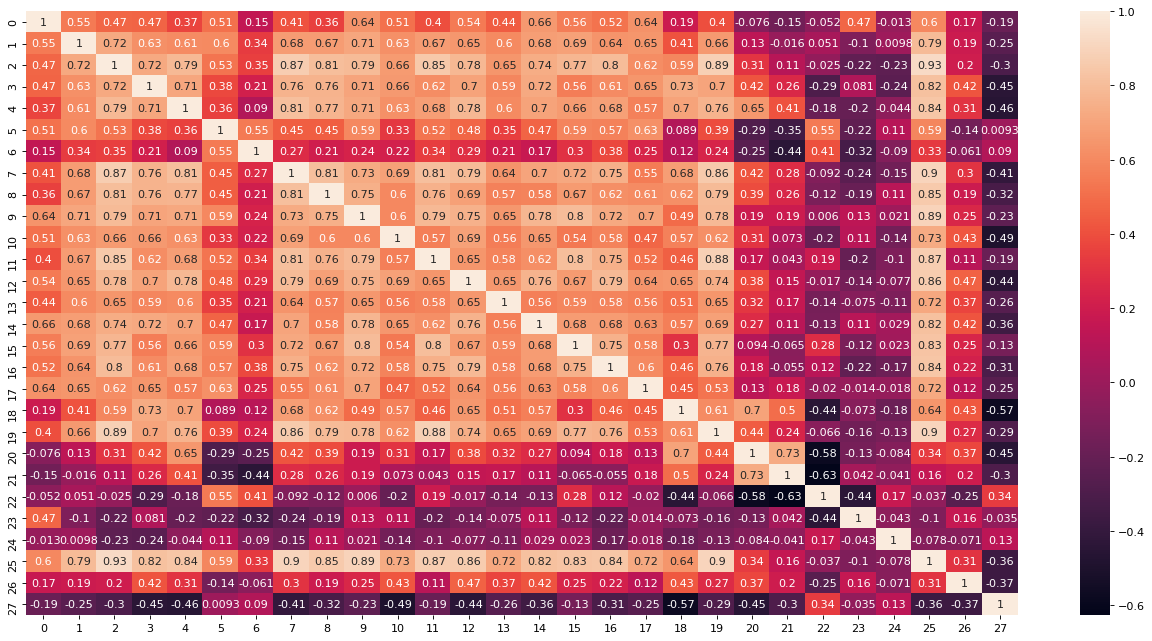

In [ ]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr(),annot=True)

In [ ]:
X=df.iloc[:, :-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,20,4,12,21,15,11,5,17,21,19,2,7,14,5,10,9,12,17,6,5,0.112,0.341,0.177,0.267,6.247,26469.27,40.58
1,12,2,10,4,5,29,9,9,4,10,2,9,7,2,4,9,14,11,0,0,0.033,0.230,0.355,0.184,5.750,15171.57,18.15
2,9,3,10,9,4,24,8,9,11,9,2,7,5,5,5,11,8,14,0,1,0.032,0.240,0.305,0.188,6.218,16067.77,24.93
3,14,3,10,6,4,24,8,6,8,6,1,10,8,4,5,7,15,14,0,1,0.032,0.201,0.318,0.175,6.208,15706.10,24.82
4,8,3,9,10,4,25,8,9,9,8,3,4,5,7,4,10,10,15,0,1,0.033,0.242,0.288,0.190,5.689,15706.10,24.82


In [ ]:
y=df.iloc[:,-1]

def_encoder = LabelEncoder()
y = def_encoder.fit_transform(y)

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
correlated_features = set()
correlation_matrix = df.drop(27, axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
list(correlated_features)

[7, 8, 11, 15, 16, 19, 25]

In [ ]:
X = X.drop(list(correlated_features),axis=1)
target = y

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 16


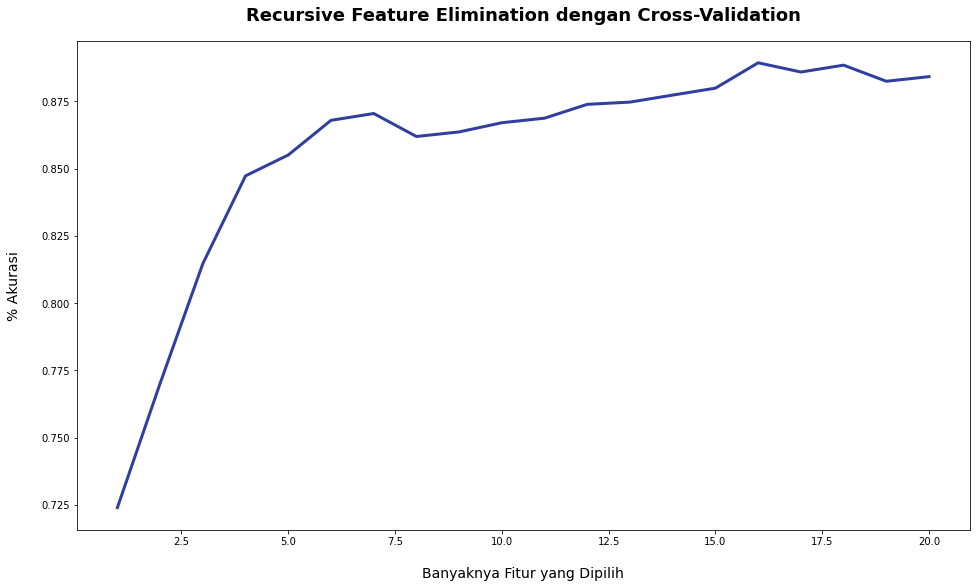

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination dengan Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Banyaknya Fitur yang Dipilih', fontsize=14, labelpad=20)
plt.ylabel('% Akurasi', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 0  6 10 11]


In [ ]:
rfecv.estimator_.feature_importances_

array([0.03806551, 0.03673532, 0.08595744, 0.10376011, 0.03764321,
       0.03238445, 0.08447126, 0.09997167, 0.03501975, 0.13954324,
       0.06676295, 0.04560422, 0.05763602, 0.04119718, 0.0517392 ,
       0.04350845])

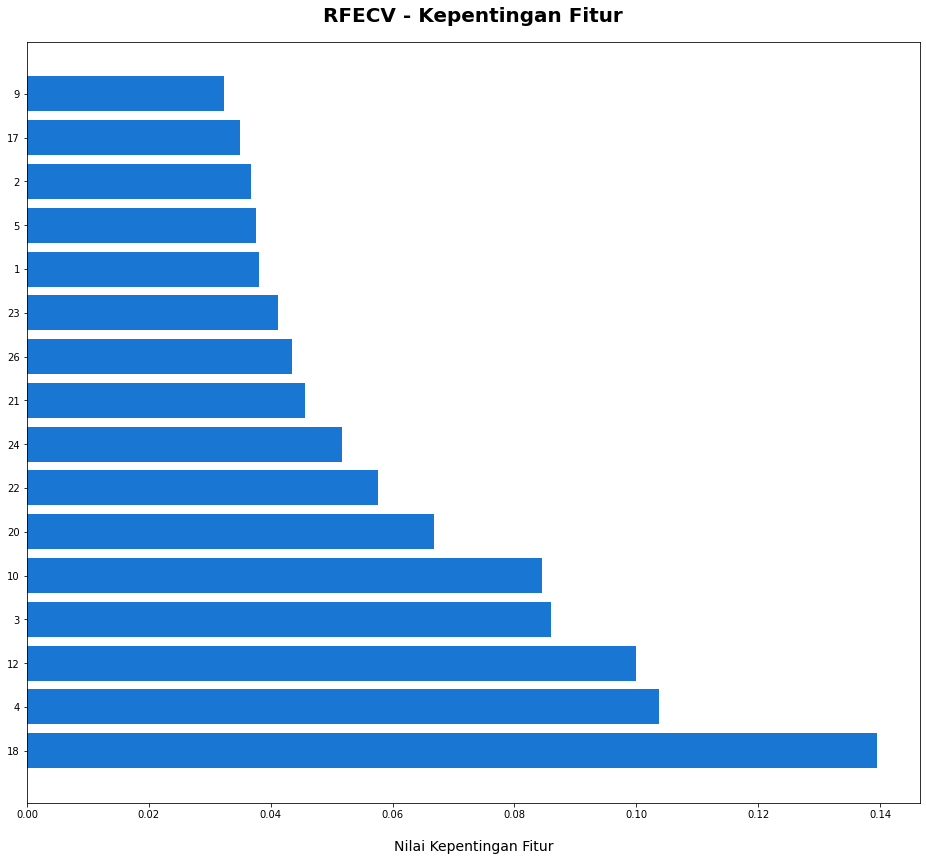

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset['attr']=dset['attr'].astype(str)
dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Kepentingan Fitur', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Nilai Kepentingan Fitur', fontsize=14, labelpad=20)
plt.show()

In [ ]:
X.columns

Int64Index([1, 2, 3, 4, 5, 9, 10, 12, 17, 18, 20, 21, 22, 23, 24, 26], dtype='int64')

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Visualization by dimensionality reduction with PCA

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

explained variance ratio: [0.43919931 0.19326291]
Preserved Variance: 0.6324622139999844


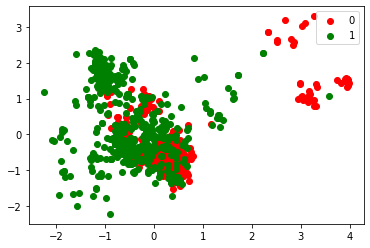

In [ ]:
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)
print("explained variance ratio:", pca.explained_variance_ratio_)
print("Preserved Variance:", sum(pca.explained_variance_ratio_))

# Print scatter plot to view classification of the simplified dataset
colors = cycle('rgb')
target_names = [0, 1]

plt.figure()

target_list = np.array(y).flatten()
for t_name, c in zip(target_names, colors):
    plt.scatter(X_pca[target_list == t_name, 0], X_pca[target_list ==t_name, 1], c=c, label=t_name)

plt.legend()
plt.show()

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=1)

svc=SVC()
svc.fit(X_train_pca,y_train_pca)
y_pred=svc.predict(X_test_pca)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test_pca,y_pred))

Accuracy Score:
0.8376068376068376


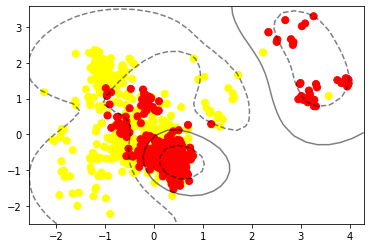

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(svc)

#Initial training with various kernel hyperparameter

In [ ]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9017094017094017


In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8418803418803419


In [ ]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9017094017094017


In [ ]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8034188034188035


# Cross Validation (Hyperparameter Candidate)

In [ ]:
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.70940171 0.67381974 0.87553648 0.68240343 0.84978541]
0.7581893547558783


In [ ]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy') 
print(scores)
print(scores.mean())

[0.51709402 0.84120172 0.87553648 0.7167382  0.83261803]
0.7566376875389751


In [ ]:
svc=SVC()
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy') 
print(scores)
print(scores.mean())

[0.51709402 0.84120172 0.87553648 0.7167382  0.83261803]
0.7566376875389751


In [ ]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy') 
print(scores)
print(scores.mean())

[0.71794872 0.70386266 0.73819742 0.80257511 0.79828326]
0.752173434576868


Text(0, 0.5, 'Cross-Validated Accuracy')

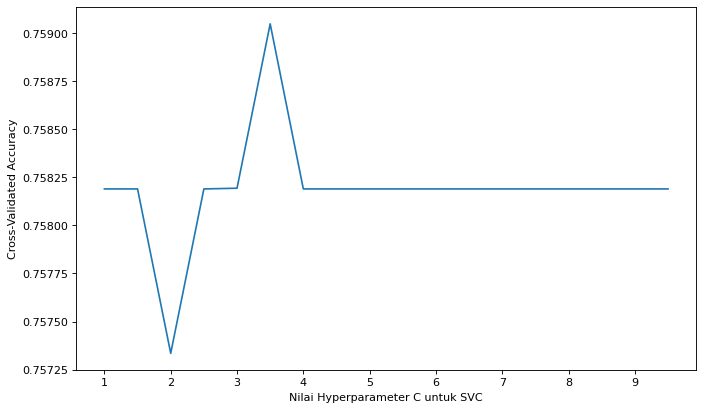

In [ ]:
C_range=list(np.arange(1,10,0.5))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())

C_values=list(np.arange(1,10,0.5))
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(C_values,acc_score)
plt.xticks(np.arange(1,10,1))
plt.xlabel('Nilai Hyperparameter C untuk SVC')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

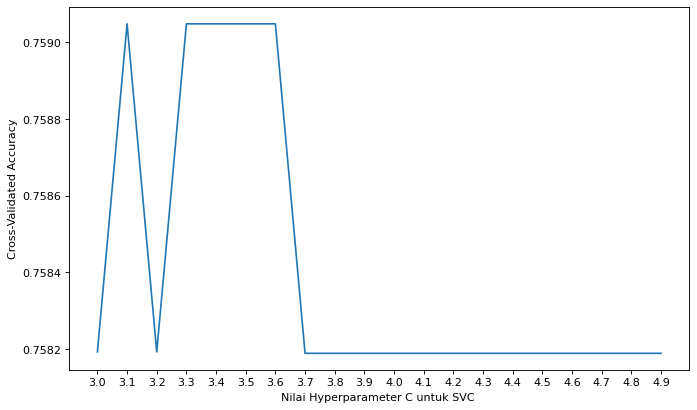

In [ ]:
C_range=list(np.arange(3,5,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())

C_values=list(np.arange(3,5,0.1))
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(C_values,acc_score)
plt.xticks(np.arange(3,5,0.1))
plt.xlabel('Nilai Hyperparameter C untuk SVC ')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

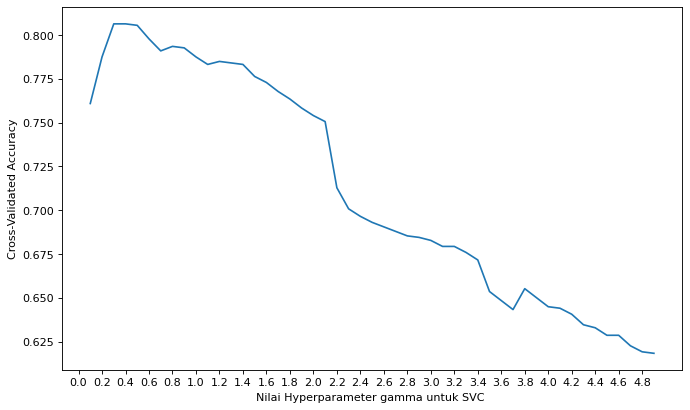

In [ ]:
gamma_range=list(np.arange(0.1,5,0.1))
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(gamma_range,acc_score)
plt.xlabel('Nilai Hyperparameter gamma untuk SVC ')
plt.xticks(np.arange(0,5,0.2))
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

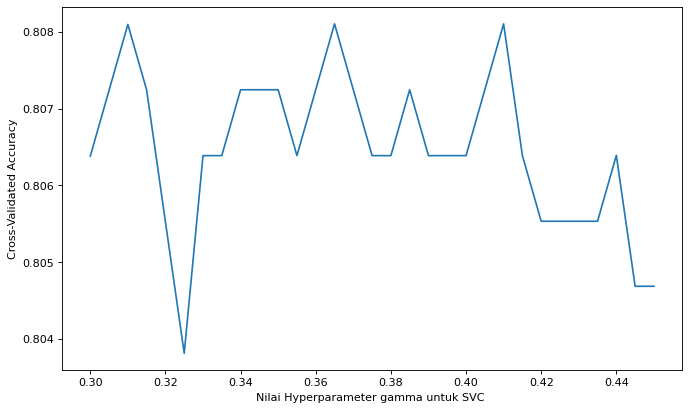

In [ ]:
gamma_range=list(np.arange(0.3,0.45,0.005))
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(gamma_range,acc_score)
plt.xlabel('Nilai Hyperparameter gamma untuk SVC ')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

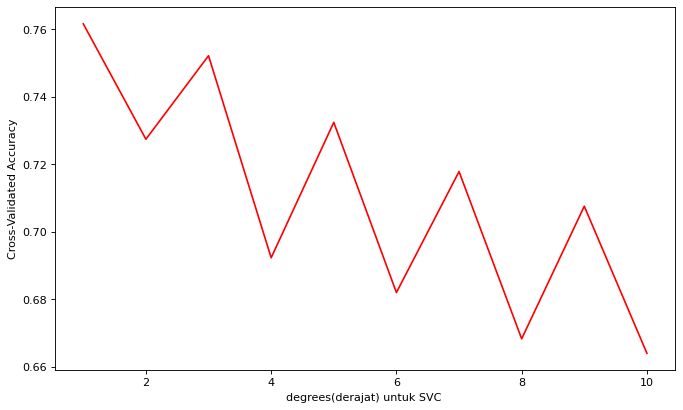

In [ ]:
degree=[1,2,3,4,5,6,7,8,9,10]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_score.append(scores.mean())
    
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees(derajat) untuk SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
svc= SVC(kernel='linear',C=3.5)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print('Akurasi:',accuracy_score)

scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
print('Skor CV:',scores)
print('Mean Skor CV:',scores.mean())

Akurasi: 0.8418803418803419
Skor CV: [0.70940171 0.67811159 0.87553648 0.68240343 0.84978541]
Mean Skor CV: 0.7590477238545909


In [ ]:
svc= SVC(kernel='rbf',gamma=0.31)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score=metrics.accuracy_score(y_test,y_predict)
print('Akurasi:',accuracy_score)

scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
print('Skor CV:',scores)
print('Mean Skor CV:',scores.mean())

Akurasi: 0.8974358974358975
Skor CV: [0.56837607 0.89270386 0.86695279 0.81545064 0.89699571]
Mean Skor CV: 0.8080958145335828


In [ ]:
svc=SVC(kernel='linear',gamma=0.31)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score=metrics.accuracy_score(y_test,y_predict)
print('Akurasi:',accuracy_score)

scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
print('Skor CV:',scores)
print('Mean Skor CV:',scores.mean())

Akurasi: 0.8418803418803419
Skor CV: [0.70940171 0.67381974 0.87553648 0.68240343 0.84978541]
Mean Skor CV: 0.7581893547558783


In [ ]:
svc= SVC(kernel='poly',degree=7)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print('Akurasi:',accuracy_score)

scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
print('Skor CV:',scores)
print('Mean Skor CV:',scores.mean())

Akurasi: 0.717948717948718
Skor CV: [0.71367521 0.63519313 0.69957082 0.74678112 0.79399142]
Mean Skor CV: 0.7178423388723818


#Final model tuning with GridCV

In [ ]:
svm_model= SVC()
tuned_parameters = {'C': np.arange(3,3.7,0.1) ,
                    'kernel': ['linear','rbf','poly'],
                    'gamma': np.arange(0.3,0.45,0.005),
                    'degree': [1,3,5]} 
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=5,scoring='accuracy',return_train_score=True)

In [ ]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9120809614168248


In [ ]:
print(model_svm.best_params_)

{'C': 3.6000000000000005, 'degree': 1, 'gamma': 0.3, 'kernel': 'rbf'}


In [ ]:
y_pred= model_svm.predict(X_test)
print('Akurasi:',metrics.accuracy_score(y_pred,y_test))

Akurasi: 0.905982905982906


In [ ]:
confusion_matrix(y_test, y_pred, labels=[0,1], sample_weight=None, normalize=None)

array([[ 97,  12],
       [ 10, 115]])

In [ ]:
#Overfitting check
y_of=model_svm.predict(X_train)
print('Akurasi:',metrics.accuracy_score(y_of,y_train))

Akurasi: 0.9753218884120172


In [ ]:
#validation accuracy cannot have high difference with the new train accuracy
scores=cross_val_score(model_svm,X_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))